In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, log_loss, mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\abhay\Downloads\titanic.csv")
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [3]:
min_value = df['Fare'].min()
max_value = df['Fare'].max()
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 0.0
Maximum value: 512.3292


In [4]:
import numpy as np

text = []
number = []

for i in df.columns:
  if (type(df[i][0]) == str):
    text.append(i)
  else:
    number.append(i)

In [5]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for i in text:
  df[i] = label_encoder.fit_transform(df[i])

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [8]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
df.duplicated().sum()

111

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Print the rows with duplicates
print(df.duplicated().sum())

0


In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


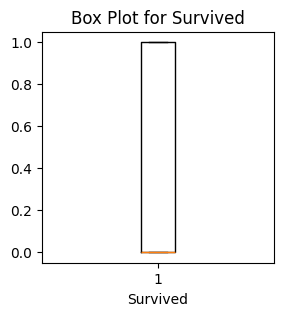

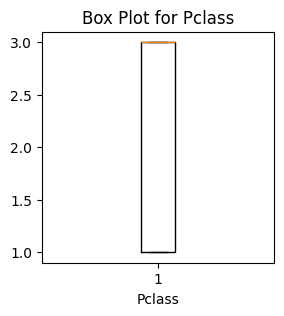

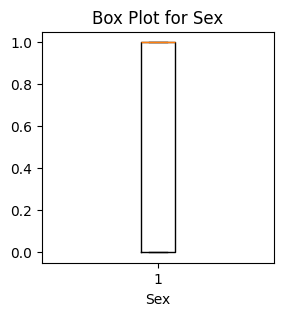

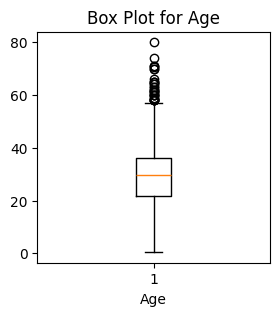

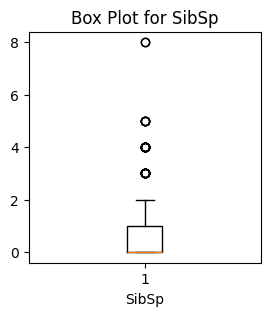

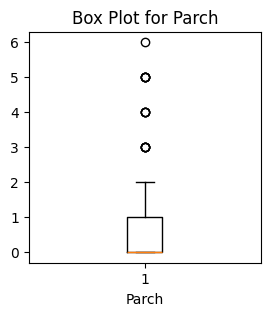

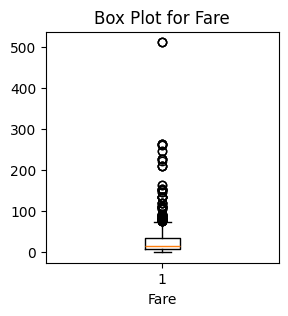

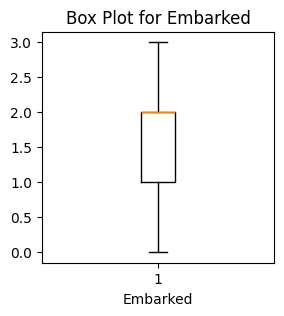

In [14]:
import matplotlib.pyplot as plt
# Select numeric columns
numeric_columns = df.select_dtypes(include='number')

# Create box plots for all numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(numeric_columns[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel

In [15]:
X = df.drop(['Survived'], axis=1)
Y = df['Survived']

In [16]:
Y.value_counts()

Survived
0    458
1    322
Name: count, dtype: int64

In [17]:
# Create a RobustScaler instance
scaler = RobustScaler()

XX = scaler.fit_transform(X)

In [18]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.000000,0,5,29.1250,1
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [19]:
# Compute Mutual Information
mutual_info = mutual_info_classif(XX, Y)

# Convert the array to a pandas series for easier visualization
mutual_info_series = pd.Series(mutual_info, index = X.columns)

# You can also sort and plot the values for better visualization
mutual_info_series.sort_values(ascending=False) #.plot.bar(figsize=(10, 5))

Sex         0.154691
Fare        0.106746
Pclass      0.042697
Parch       0.040811
Embarked    0.035564
Age         0.009556
SibSp       0.000000
dtype: float64

In [26]:
# # Apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=7)
# fit = bestfeatures.fit(XX,Y)

# # Get the scores for each feature
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

# # Concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns, dfscores], axis=1)
# featureScores.columns = ['Feature','Score']  # naming the dataframe columns

# # Print the best features
# print(featureScores.nlargest(3,'Score')) # print 10 best features

In [ ]:
# XX = df[['Sex', 'Fare', 'Pclass', 'Embarked']]
# XX

In [20]:
model = DecisionTreeClassifier()
# Define a parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20, 50, 100],
}

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=10)

# Fit the model to the data and find the best hyperparameters
grid_search.fit(XX, Y)

# Get the best hyperparameters
best_alpha = grid_search.best_params_

# Create a LinearRegression model with the best hyperparameters
model = DecisionTreeClassifier(**best_alpha)


X_train, X_test, y_train, y_test = train_test_split(XX, Y, test_size=0.3, random_state=42)
# Fit the model to the scaled training data
model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.24358974358974358


In [21]:
accuracy_score(y_test, y_pred)

0.7564102564102564

In [22]:
# Perform cross-validation and calculate R-squared scores
scores = cross_val_score(model, XX, Y, cv=5, scoring='f1')  # cv is the number of folds (e.g., 5-fold cross-validation)

# Print the R-squared scores
print("R-squared Scores:", scores)

# Calculate the mean R-squared score
mean_r2_score = scores.mean()
print("Mean R-squared Score:", mean_r2_score)

R-squared Scores: [0.62903226 0.69026549 0.74603175 0.67241379 0.73913043]
Mean R-squared Score: 0.6953747437415966


In [23]:
# Calculate and print classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_prob)
# logloss = log_loss(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
# print(f'ROC AUC: {roc_auc:.2f}')
# print(f'Log Loss: {logloss:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.76
Precision: 0.74
Recall: 0.61
F1 Score: 0.67
Confusion Matrix:
[[119  20]
 [ 37  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       139
           1       0.74      0.61      0.67        95

    accuracy                           0.76       234
   macro avg       0.75      0.73      0.74       234
weighted avg       0.76      0.76      0.75       234



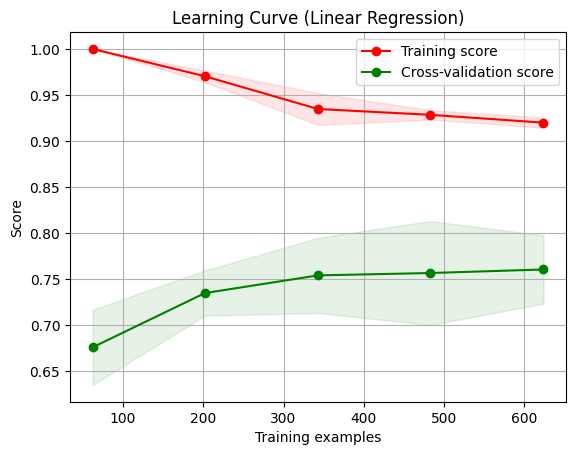

In [24]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
# Define the learning curve function
def plot_learning_curve(estimator, title, X, Y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(model, "Learning Curve (Linear Regression)", XX, Y, cv=5)
plt.show()